In [29]:
import numpy as np
import pandas as pd
import plotly.express as px

# Binning of data

Exercise 2.2 gave the following data for attribute age(in increasing order).
<br>
Use smoothing by bin means to smooth the data using bin depth of 3

In [30]:
age      = [13,15,16,16,19,20,20,21,22,22,25,25,25,25,30,33,33,35,35,35,35,36,40,45,46,52,70]
bin_size = 3

In [31]:
print('------------------------------------------------------------------------')
print('Partition to equal interval bins')
bin_dict_equal = {}
counter        = 1
for i in range(0,len(age),bin_size):
  bin_dict_equal[f'Bin_{counter}'] = age[i:i+3]
  counter+=1
print(f'The partition to equal interval bins results in the following binning- ')
display(bin_dict_equal)
print('\n')


print('------------------------------------------------------------------------')
print('Smoothing by bin Means')
bin_dict_mean = {}
counter       = 1
for i in range(0,len(age),bin_size):
  bin_dict_mean[f'Bin_{counter}'] = [round(np.mean(age[i:i+3]),3)]*bin_size
  counter+=1
print(f'The smoothing by bin means results in the following bins- ')
display(bin_dict_mean)
print('\n')


------------------------------------------------------------------------
Partition to equal interval bins
The partition to equal interval bins results in the following binning- 


{'Bin_1': [13, 15, 16],
 'Bin_2': [16, 19, 20],
 'Bin_3': [20, 21, 22],
 'Bin_4': [22, 25, 25],
 'Bin_5': [25, 25, 30],
 'Bin_6': [33, 33, 35],
 'Bin_7': [35, 35, 35],
 'Bin_8': [36, 40, 45],
 'Bin_9': [46, 52, 70]}



------------------------------------------------------------------------
Smoothing by bin Means
The smoothing by bin means results in the following bins- 


{'Bin_1': [14.667, 14.667, 14.667],
 'Bin_2': [18.333, 18.333, 18.333],
 'Bin_3': [21.0, 21.0, 21.0],
 'Bin_4': [24.0, 24.0, 24.0],
 'Bin_5': [26.667, 26.667, 26.667],
 'Bin_6': [33.667, 33.667, 33.667],
 'Bin_7': [35.0, 35.0, 35.0],
 'Bin_8': [40.333, 40.333, 40.333],
 'Bin_9': [56.0, 56.0, 56.0]}

In [32]:
def replace_by_boundaries(vector):
  '''
      Making sure that the nearest bounday is mapped with the variable
  '''
  min = np.min(vector)
  max = np.max(vector)

  binned_vect = vector.copy()
  for i in range(len(vector)):
    if np.abs(vector[i]-min)> np.abs(vector[i]-max):
      binned_vect[i] = max
    else:
      binned_vect[i] = min

  return binned_vect


In [33]:
print('------------------------------------------------------------------------')
print('Smoothing by bin Boundaries')
bin_dict_boundaries = {}
bin_dict_equal      = {}
counter             = 1
for i in range(0,len(age),bin_size):
  bin_dict_equal[f'Bin_{counter}']      = age[i:i+3]
  bin_dict_boundaries[f'Bin_{counter}'] = replace_by_boundaries(age[i:i+3])
  counter+=1

print('The partition based on equal frequency is given as ')
display(bin_dict_equal)
print('\n')
print(f'The smoothing by bin boundaries results in the following bins- ')
display(bin_dict_boundaries)
print('\n')
print('------------------------------------------------------------------------')

------------------------------------------------------------------------
Smoothing by bin Boundaries
The partition based on equal frequency is given as 


{'Bin_1': [13, 15, 16],
 'Bin_2': [16, 19, 20],
 'Bin_3': [20, 21, 22],
 'Bin_4': [22, 25, 25],
 'Bin_5': [25, 25, 30],
 'Bin_6': [33, 33, 35],
 'Bin_7': [35, 35, 35],
 'Bin_8': [36, 40, 45],
 'Bin_9': [46, 52, 70]}



The smoothing by bin boundaries results in the following bins- 


{'Bin_1': [13, 16, 16],
 'Bin_2': [16, 20, 20],
 'Bin_3': [20, 20, 22],
 'Bin_4': [22, 25, 25],
 'Bin_5': [25, 25, 30],
 'Bin_6': [33, 33, 35],
 'Bin_7': [35, 35, 35],
 'Bin_8': [36, 36, 45],
 'Bin_9': [46, 46, 70]}



------------------------------------------------------------------------


## Outlier detection using clustering 
We will use clustering to find out the outliers in the dataset

In [34]:
from sklearn.cluster import KMeans

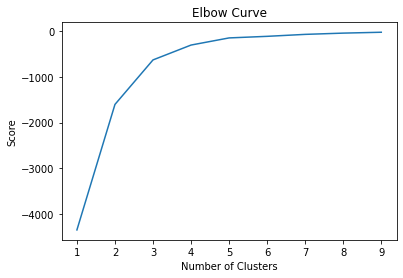

In [35]:
X          = np.array(age).reshape(-1,1)
K_clusters = range(1,10)
kmeans     = [KMeans(n_clusters=i) for i in K_clusters]
score      = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]

import matplotlib.pyplot as plt

plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

We will select the cluster of 4 using Elbow method and if we plot the clusters along with their cluster centers, we can see one outlier as well

In [53]:
cluster = 4
kmeans  = KMeans(n_clusters = cluster,random_state=13)
_       = kmeans.fit(X) 
preds   = kmeans.fit_predict(X)
centers = kmeans.cluster_centers_
center_map = dict(zip(range(cluster),centers.ravel()))

cluster_df                  = pd.DataFrame(columns = ['actual_values','clusters'])
cluster_df['actual_values'] = X.ravel()
cluster_df['clusters']      = preds
cluster_df['centres']       = cluster_df['clusters'].map(center_map)
px.scatter(x=cluster_df['actual_values'],y=cluster_df['centres'], color= cluster_df['clusters'])

In [45]:
centers

array([[22.4       ],
       [47.66666667],
       [34.66666667],
       [70.        ],
       [15.        ]])